<a href="https://colab.research.google.com/github/chricannon/Predicting_popular_platforms/blob/main/Project2_Stroke_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
# Import necessary libraries
import os
from skimage.feature import local_binary_pattern
import numpy as np
import pandas as pd
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage.filters import prewitt_h, prewitt_v
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import matplotlib.pyplot as plt
from google.colab import drive
import pickle

In [87]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
!ls '/content/drive/MyDrive/Brain_Data_Organised'

Normal	Stroke


In [89]:
#list for normal images
normal_images = []
#list for stroke images
stroke_images = []

In [90]:
stroke_path = '/content/drive/MyDrive/Brain_Data_Organised/Stroke'
normal_path = '/content/drive/MyDrive/Brain_Data_Organised/Normal'

In [91]:
normal_images = [normal_path+'/'+f for f in os.listdir(normal_path) if os.path.isfile(os.path.join(normal_path, f))][:10]
normal_images

['/content/drive/MyDrive/Brain_Data_Organised/Normal/64 (14).jpg',
 '/content/drive/MyDrive/Brain_Data_Organised/Normal/110 (19).jpg',
 '/content/drive/MyDrive/Brain_Data_Organised/Normal/63 (1).jpg',
 '/content/drive/MyDrive/Brain_Data_Organised/Normal/65 (14).jpg',
 '/content/drive/MyDrive/Brain_Data_Organised/Normal/111 (19).jpg',
 '/content/drive/MyDrive/Brain_Data_Organised/Normal/53 (8).jpg',
 '/content/drive/MyDrive/Brain_Data_Organised/Normal/112 (10).jpg',
 '/content/drive/MyDrive/Brain_Data_Organised/Normal/95 (10).jpg',
 '/content/drive/MyDrive/Brain_Data_Organised/Normal/60 (20).jpg',
 '/content/drive/MyDrive/Brain_Data_Organised/Normal/96 (19).jpg']

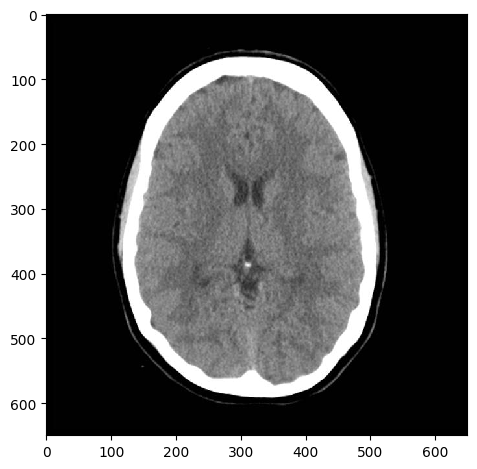

In [92]:
x=imread(normal_images[0])
imshow(x)

In [93]:
#building dataframe for normal
normal_images_df = pd.DataFrame({'category':0, 'image_path': normal_images})
normal_images_df.head()


,category,image_path
0,0,/content/drive/MyDrive/Brain_Data_Organised/No...
1,0,/content/drive/MyDrive/Brain_Data_Organised/No...
2,0,/content/drive/MyDrive/Brain_Data_Organised/No...
3,0,/content/drive/MyDrive/Brain_Data_Organised/No...
4,0,/content/drive/MyDrive/Brain_Data_Organised/No...


In [94]:
stroke_images = [stroke_path+'/'+f for f in os.listdir(stroke_path) if os.path.isfile(os.path.join(stroke_path, f))][:10]
stroke_images

['/content/drive/MyDrive/Brain_Data_Organised/Stroke/89 (4).jpg',
 '/content/drive/MyDrive/Brain_Data_Organised/Stroke/94 (31).jpg',
 '/content/drive/MyDrive/Brain_Data_Organised/Stroke/97 (38).jpg',
 '/content/drive/MyDrive/Brain_Data_Organised/Stroke/86 (24).jpg',
 '/content/drive/MyDrive/Brain_Data_Organised/Stroke/73 (14).jpg',
 '/content/drive/MyDrive/Brain_Data_Organised/Stroke/86 (32).jpg',
 '/content/drive/MyDrive/Brain_Data_Organised/Stroke/77 (36).jpg',
 '/content/drive/MyDrive/Brain_Data_Organised/Stroke/91 (13).jpg',
 '/content/drive/MyDrive/Brain_Data_Organised/Stroke/90 (13).jpg',
 '/content/drive/MyDrive/Brain_Data_Organised/Stroke/69 (12).jpg']

In [95]:
#building dataframe for normal
stroke_images_df = pd.DataFrame({'category':1, 'image_path': stroke_images})
stroke_images_df.head()

,category,image_path
0,1,/content/drive/MyDrive/Brain_Data_Organised/St...
1,1,/content/drive/MyDrive/Brain_Data_Organised/St...
2,1,/content/drive/MyDrive/Brain_Data_Organised/St...
3,1,/content/drive/MyDrive/Brain_Data_Organised/St...
4,1,/content/drive/MyDrive/Brain_Data_Organised/St...


In [96]:
image_dataset = pd.concat([normal_images_df, stroke_images_df], axis=0).reset_index(drop=True)
image_dataset

,category,image_path
0,0,/content/drive/MyDrive/Brain_Data_Organised/No...
1,0,/content/drive/MyDrive/Brain_Data_Organised/No...
2,0,/content/drive/MyDrive/Brain_Data_Organised/No...
3,0,/content/drive/MyDrive/Brain_Data_Organised/No...
4,0,/content/drive/MyDrive/Brain_Data_Organised/No...
5,0,/content/drive/MyDrive/Brain_Data_Organised/No...
6,0,/content/drive/MyDrive/Brain_Data_Organised/No...
7,0,/content/drive/MyDrive/Brain_Data_Organised/No...
8,0,/content/drive/MyDrive/Brain_Data_Organised/No...
9,0,/content/drive/MyDrive/Brain_Data_Organised/No...


In [97]:
image_dataset['category'].value_counts()

,count
category,
0,10
1,10


In [98]:
print(image_dataset.columns)

Index(['category', 'image_path'], dtype='object')


In [99]:
image_dataset.columns = image_dataset.columns.str.strip()

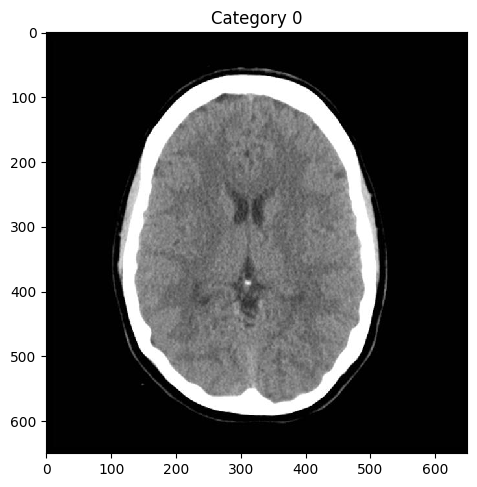

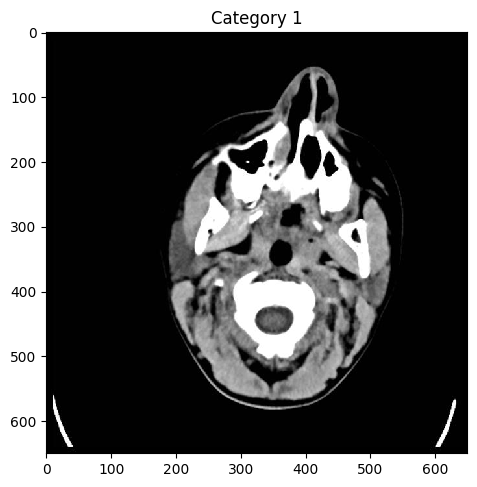

In [100]:
#converting numeric values in category column to strings
image_dataset['category'] = image_dataset['category'].astype(str)

# Display sample images from each category
for cat in sorted(image_dataset['category'].unique()):
    sample_image_path = image_dataset[image_dataset['category'] == cat].iloc[0]['image_path']
    full_image_path = get_image_path(cat, sample_image_path)
    image = imread(full_image_path)
    imshow(image)
    plt.title(f'Category {cat}')
    plt.show()

In [101]:
# Define categories for analysis, here focusing on 'Normal v Stroke Images'
categories = {
    'Normal vs Stroke Images': image_dataset[(image_dataset['category'] == 0) | (image_dataset['category'] == 1)]
}


# Process each category set for feature extraction and classification
for comparison, image_dataset in categories.items():
    # Get list of image names for the category
    image_list = image_dataset['image_path'].tolist()

     # Parameters for Local Binary Pattern (LBP) feature extraction
    METHOD = 'uniform'
    radius = 1
    n_points = 8 * radius

    all_features = []  # List to hold all extracted features

     # Loop through each image, extract features, and store them
    for image_name in image_list:
        full_image_path = os.path.join(cat, sample_image_path)
        image = imread(full_image_path)  # Read the image
        image = resize(image, (100, 100))  # Resize image to 100x100 pixels

        # Extract RGB features by averaging the pixel values
        rgb_feature_matrix = np.mean(image, axis=2)
        rgb_features = rgb_feature_matrix.flatten()  # Flatten to 1D array

        # Convert image to grayscale for further feature extraction
        gray_image = rgb2gray(image)

        # Extract Local Binary Pattern features
        lbp_image = local_binary_pattern(gray_image, n_points, radius, METHOD)
        lbp_features = lbp_image.flatten()

        # Extract horizontal and vertical edge features using Prewitt filters
        horizontal_edges = prewitt_h(gray_image).flatten()
        vertical_edges = prewitt_v(gray_image).flatten()

        # Combine all features into a single array
        features = np.concatenate([rgb_features, lbp_features, horizontal_edges, vertical_edges])
        all_features.append(features)

      # Convert the list of features to a NumPy array
    X = np.array(all_features)
    y = image_dataset['category'].values  # Labels for each image

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

    # # Standardize the feature values
    # sc = StandardScaler()
    # X_train = sc.fit_transform(X_train)
    # X_test = sc.transform(X_test)

    # # Define classifiers to use
    # classifiers = {
    #     'Decision Tree': DecisionTreeClassifier(),
    #     'KNN': KNeighborsClassifier(n_neighbors=10),
    #     'Gaussian NB': GaussianNB(),
    #     'Random Forest': RandomForestClassifier(n_estimators=100),
    #     'Logistic Regression': LogisticRegression(random_state=0, max_iter=100, solver='lbfgs', multi_class='auto'),
    #     'SVM Linear': svm.SVC(kernel='linear', C=1, decision_function_shape='ovo', probability=True),
    #     'SVM RBF': svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo', probability=True),
    #     'SVM Polynomial': svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo', probability=True),
    #     'SVM Sigmoid': svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo', probability=True)
    # }

ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.